In [87]:
import numpy as np
import pandas as pd

In [88]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [89]:
from sklearn.impute import SimpleImputer

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [91]:
from sklearn.decomposition import PCA

In [187]:
from sklearn.model_selection import train_test_split

In [114]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [115]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [116]:
def pre_process_data(inputDf):
    df = inputDf.copy()
    
    df["is_male"] = df.Sex.replace({"male": 1, "female": 0})

    age_mean = df.Age.mean()
    df.Age.fillna(value=age_mean, inplace=True)
    
    fare_mean = df.Fare.mean()
    df.Fare.fillna(value=fare_mean, inplace=True)
    
    emb_most = df.Embarked.value_counts().index[0]
    df.Embarked.fillna(value=emb_most, inplace=True)
    
    df = pd.get_dummies(df, columns=['Pclass', 'Embarked'])
    
    df.drop(["Sex", "Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)
    
    return df

In [117]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
train_p = pre_process_data(train)

In [161]:
train_p.head()

,Age,SibSp,Parch,Fare,is_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,0,1


In [162]:
scaler = StandardScaler()

In [163]:
scaler.fit(train_p)

C:\Users\costa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [164]:
col_names = train_p.columns

In [165]:
train_p = scaler.transform(train_p)
train_p = pd.DataFrame(train_p, columns=col_names)

C:\Users\costa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [166]:
train_p.head()

,Age,SibSp,Parch,Fare,is_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.615838
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.623803
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.615838
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.615838
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.615838


In [167]:
pca = PCA(n_components=2)

In [168]:
ppl = pca.fit_transform(train_p)

In [169]:
pca.explained_variance_ratio_.sum()

0.41022927885036076

Text(0.5, 1.0, 'Пассажиры Титаника')

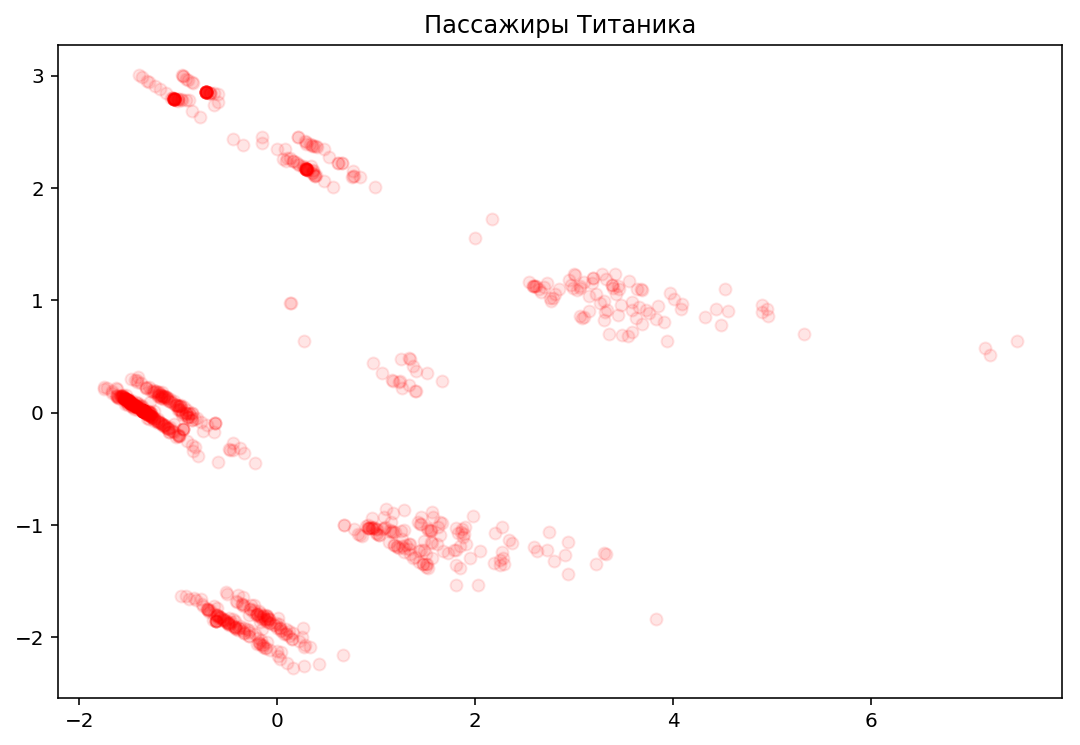

In [178]:
plt.plot(ppl[:,0], ppl[:,1], 'ro', alpha=0.1)
plt.title('Пассажиры Титаника')

In [179]:
from sklearn.cluster import KMeans

In [180]:
n_clusters = 7

In [181]:
kmeans = KMeans(n_clusters=n_clusters)

In [182]:
kmeans.fit(train_p)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [183]:
cluster_labels = kmeans.predict(train_p)

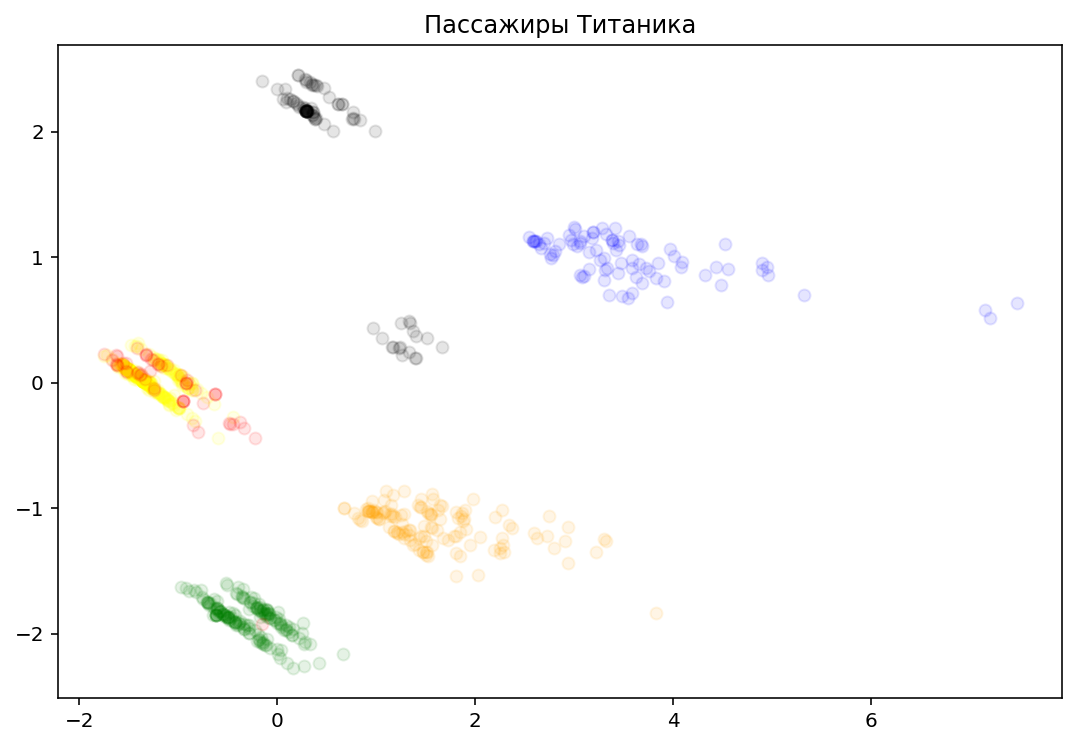

In [184]:
plt.title('Пассажиры Титаника')
for i,color in zip(range(n_clusters),{'blue','red','green','black','orange','yellow'}):
    t = ppl[cluster_labels==i]
    plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)

In [268]:
X_train_fin, X_val, y_train_fin, y_val = train_test_split(train_p, y_train, test_size=0.2)

In [269]:
X_train_fin.shape

(712, 11)

In [270]:
X_val.shape

(179, 11)

In [271]:
test_p = pre_process_data(test)

In [272]:
test_p = scaler.transform(test_p)
test_p = pd.DataFrame(test_p, columns=col_names)

C:\Users\costa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [274]:
test_p.shape

(418, 11)

In [275]:
y_train_fin.shape

(712,)

In [276]:
y_val.shape

(179,)

In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [289]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [290]:
%%time
gridsearch.fit(X_train_fin, y_train_fin)

Wall time: 120 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [291]:
print(gridsearch.best_params_ )

{'max_depth': 6}


In [292]:
gridsearch.cv_results_['mean_train_score']

C:\Users\costa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.7837098 , 0.79178183, 0.82338544, 0.84269602, 0.860259  ,
       0.8820288 , 0.89923596, 0.9178454 , 0.93294237])

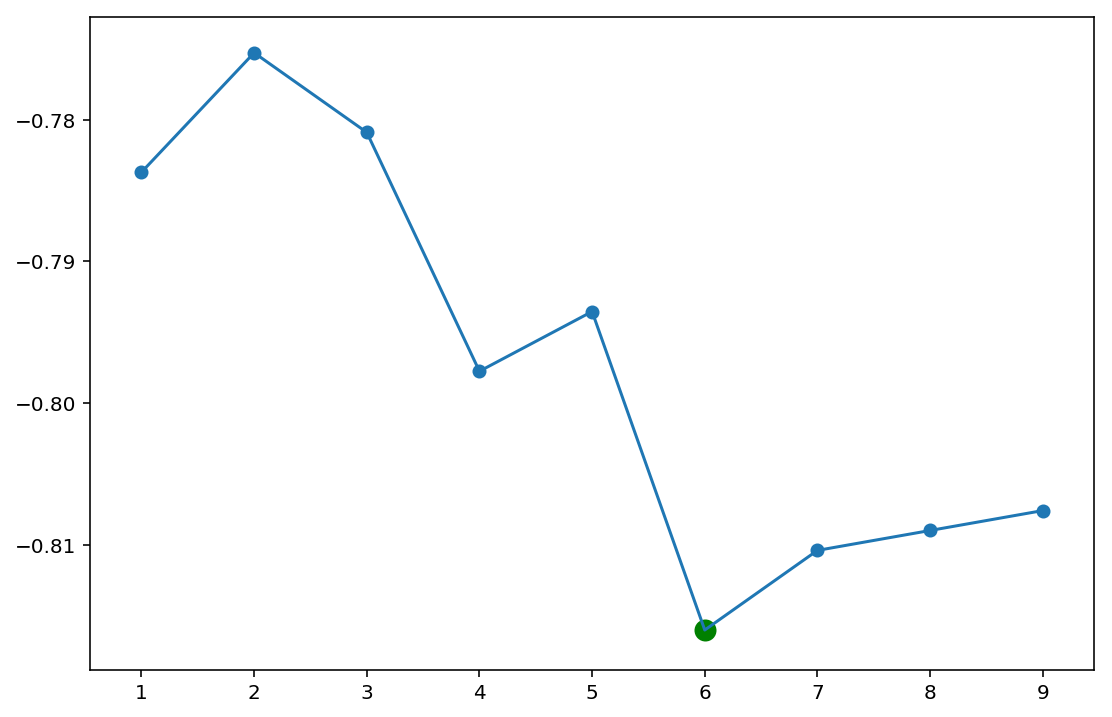

In [295]:
scores = [-x for x in gridsearch.cv_results_['mean_test_score']]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [296]:
clf_final = DecisionTreeClassifier(max_depth=6)

In [297]:
clf_final.fit(X_train_fin, y_train_fin)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [298]:
y_val_pred = clf_final.predict(X_val)

In [299]:
accuracy_score(y_val, y_val_pred)

0.8044692737430168

In [308]:
clf_final.feature_importances_

array([0.11743753, 0.05214553, 0.01267137, 0.11779781, 0.51403606,
       0.04578961, 0.        , 0.12874264, 0.00313023, 0.        ,
       0.00824922])

In [309]:
X_train_fin.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'is_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [300]:
clf_final.fit(train_p, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [301]:
clf_final.predict_proba(test_p)[:10]

array([[0.91011236, 0.08988764],
       [1.        , 0.        ],
       [0.91011236, 0.08988764],
       [0.91011236, 0.08988764],
       [0.33333333, 0.66666667],
       [0.91011236, 0.08988764],
       [0.25490196, 0.74509804],
       [0.91011236, 0.08988764],
       [0.25490196, 0.74509804],
       [0.91011236, 0.08988764]])

In [303]:
predictions = clf_final.predict(test_p)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [304]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions)])

In [310]:
with open('submission.csv', 'w') as file:
    file.write(submussion)

In [311]:
!kaggle competitions submit -c titanic -f submission.csv -m "1st test submit"

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:03<00:00, 914B/s]


In [306]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [307]:
get_tree_dot_view(clf_final, list(train_p.columns), ['Not survived', 'Survived'])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="is_male <= -0.309\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Not survived", fillcolor="#e5813960"] ;
1 [label="Pclass_3 <= -0.103\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Survived", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= -2.093\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Survived", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="Parch <= 1.388\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not survived", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived", fillcolor="#399de5ff"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not survived", fillcolor="#e58139ff"] ;
3 -> 5 ;
6 [label="Fare <= -0.067\ngini = 0.091\nsamples = 168\nvalue = [8, 160]\nclass = Survived", fillcolor="#399de5f2"] ;
2 -> 6 ;
7 [label="Fare <= -0.08\ngini = 0.182\ns